# Using Geopandas to Import BusStops

In [15]:
import geopandas as gpd

In [24]:
#Load into GeoDataFrame
gdf_BusStop = gpd.read_file('C:\.PROGRAMMING\Python\CZ1115-PROJECT\RAW_datasets\BusStopLocation_Jan2021\BusStop.shp')

In [25]:
gdf_BusStop.head()

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156)
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458)
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741)
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180)
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514)


<AxesSubplot:>

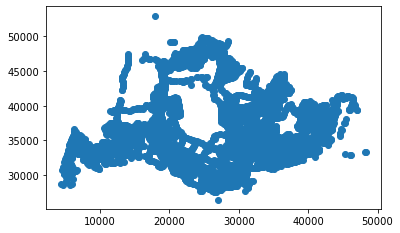

In [26]:
gdf_BusStop.plot()

# Using Geopandas to Import Subzone

In [41]:
#Load into GeoDataFrame
gdf_Subzone = gpd.read_file('C:\.PROGRAMMING\Python\CZ1115-PROJECT\RAW_datasets\master-plan-2014-subzone-boundary-web-shp')

In [42]:
gdf_Subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [43]:
from geopandas.tools import sjoin
join_left_df_BusStop = sjoin(gdf_BusStop, gdf_Subzone, how="left")
join_left_df_BusStop
# Note the NaNs where the point did not intersect a boro

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry,index_right,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156),245.0,246.0,5.0,PASIR RIS DRIVE,PRSZ05,N,PASIR RIS,PR,EAST REGION,ER,2B73597AF3F174F3,2014-12-05,42032.4580,38988.2187,5311.060366,1.639669e+06
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458),207.0,208.0,4.0,HOUGANG WEST,HGSZ04,N,HOUGANG,HG,NORTH-EAST REGION,NER,27B0E0BDE3579753,2014-12-05,33849.2205,39506.8724,6424.482139,1.328876e+06
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741),208.0,209.0,3.0,PAYA LEBAR WEST,PLSZ03,N,PAYA LEBAR,PL,EAST REGION,ER,4BADA58E2612A6E2,2014-12-05,36649.3106,39403.4873,5898.475695,6.098947e+05
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180),166.0,167.0,5.0,FRANKEL,BDSZ05,N,BEDOK,BD,EAST REGION,ER,B34F041CC4B050EC,2014-12-05,37694.5519,33007.2679,8750.386291,4.297141e+06
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514),227.0,228.0,10.0,YIO CHU KANG,AMSZ10,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,5E2B16BB381BAEA4,2014-12-05,29443.7447,40836.0207,4533.218364,9.094186e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,24539,B03,DUNDEE MARINE,POINT (8211.954 31924.108),78.0,79.0,5.0,PIONEER SECTOR,PNSZ05,N,PIONEER,PN,WEST REGION,WR,F3241D6C0FEF13ED,2014-12-05,8872.7501,31423.4434,8489.982578,2.796007e+06
5133,46441,B02,BLK 816,POINT (23143.267 47097.652),305.0,306.0,2.0,MIDVIEW,WDSZ02,N,WOODLANDS,WD,NORTH REGION,NR,42D5F52D334C615F,2014-12-05,23349.7600,46841.1143,4159.201440,9.364155e+05
5134,64391,B04,BLK 831,POINT (34273.668 39267.502),242.0,243.0,1.0,HOUGANG CENTRAL,HGSZ01,N,HOUGANG,HG,NORTH-EAST REGION,NER,C4419A9A8D05E0DF,2014-12-05,34470.7005,39076.5963,2759.815466,4.417334e+05
5135,10389,B01,BLK 48,POINT (27156.674 30126.309),6.0,7.0,9.0,BUKIT HO SWEE,BMSZ09,N,BUKIT MERAH,BM,CENTRAL REGION,CR,7839A8577144EFE2,2014-12-05,27680.0627,30230.8610,3275.312488,5.517320e+05


# Using Geopandas to Import MRT Stops

In [45]:
#Load into GeoDataFrame
gdf_MRTStop = gpd.read_file('C:\.PROGRAMMING\Python\CZ1115-PROJECT\RAW_datasets\TrainStation_Jan2020\MRTLRTStnPtt.shp')

In [46]:
gdf_MRTStop.head()


,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


<AxesSubplot:>

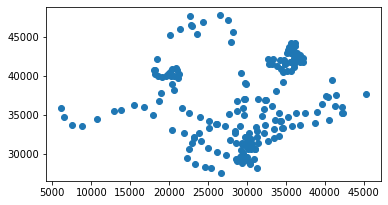

In [47]:
gdf_MRTStop.plot()

In [48]:
from geopandas.tools import sjoin
join_left_df_MRTStop = sjoin(gdf_MRTStop, gdf_Subzone, how="left")
join_left_df_MRTStop
# Note the NaNs where the point did not intersect a boro

,OBJECTID_left,STN_NAME,STN_NO,geometry,index_right,OBJECTID_right,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),169,170,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,58687154BD252A0A,2014-12-05,35237.1681,33246.0587,7028.340071,2.579087e+06
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),146,147,4,LAKESIDE,JESZ04,N,JURONG EAST,JE,WEST REGION,WR,3BBFD45071B70ECF,2014-12-05,16697.0118,35114.9062,8828.633830,3.108023e+06
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),316,317,8,KHATIB,YSSZ08,N,YISHUN,YS,NORTH REGION,NR,DC75517DA31123DB,2014-12-05,27480.6357,44420.6884,4956.145735,1.432913e+06
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),280,281,2,TURF CLUB,SKSZ02,N,SUNGEI KADUT,SK,NORTH REGION,NR,17459E60C3EEAF30,2014-12-05,20234.6006,44507.1901,7665.676019,3.291406e+06
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,189,TELOK BLANGAH MRT STATION,CC28,POINT (25376.847 28138.967),23,24,1,MARITIME SQUARE,BMSZ01,N,BUKIT MERAH,BM,CENTRAL REGION,CR,C1AC31ABF9978DDB,2014-12-05,25805.7867,27911.4193,13737.116181,2.701634e+06
181,190,TELOK AYER MRT STATION,DT18,POINT (29667.622 29414.587),35,36,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2014-12-05,29153.9676,29158.0443,4297.599910,5.872227e+05
182,191,NEWTON MRT STATION,NS21,POINT (28519.362 32735.207),120,121,3,NEWTON CIRCUS,NTSZ03,Y,NEWTON,NT,CENTRAL REGION,CR,8B2F19EEE51EDA60,2014-12-05,28587.1626,32653.9428,2399.407300,2.135816e+05
183,0,CANBERRA MRT STATION,NS12,POINT (27598.622 47200.242),307,308,2,SEMBAWANG SPRINGS,SBSZ02,N,SEMBAWANG,SB,NORTH REGION,NR,C739B507A1ACBDB3,2014-12-05,27076.8118,46959.0886,4212.042247,1.099395e+06
